In [60]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [61]:
npz = np.load('part1a.npz')
lst = npz.files
for item in lst:
    print(item)
    print(npz[item])

N = npz['N']
SVC_0_pmf = npz['Svc_0_pmf']
Lc = npz['Lc'] 
I_v= npz['Ic_0']
gamma = npz['gamma']
R = np.zeros(1)
R[0] = 0
Z = np.zeros(21)
I = np.sum(I_v)
S__ = N - I # not sure. Do this so that the total population actually adds to 100000...
S_v_c_2 = np.multiply(SVC_0_pmf, S__) # Preserve matrix form for later...
S_v_c = S_v_c_2.flatten()
S_v_I_v_R = np.concatenate((S_v_c, I_v, R)) 
print(S_v_c.sum(axis=0).sum(axis=0), I_v, R)

N
100000.0
Svc_0_pmf
[[0.10953309 0.03300776 0.08179044 0.11593994]
 [0.03089752 0.08511994 0.04528764 0.05718283]
 [0.07471465 0.02495643 0.10236599 0.04256696]
 [0.01605863 0.08109608 0.09158212 0.00789999]]
Lc
[0.3 0.4 0.7 1. ]
Ic_0
[47 90 51 65]
gamma
0.07142857142857142
99746.99999999997 [47 90 51 65] [0.]


In [62]:
# Part 1 a. Chose elements for B_v,c in [0.1]

B_v_c = np.random.rand(16).reshape(4,4)
B_v_c = np.sort(B_v_c, axis = 0)
B_v_c_2 = np.sort(B_v_c, axis = 1) # Preserve matrix form for later...
B_v_c = B_v_c_2.flatten() # Now we have elements (0,0) (0,1) (0,2) (0,3) (1,0) .... (3,3)
print(B_v_c)
print(B_v_c_2)

[0.03185406 0.09486333 0.29781687 0.72861933 0.15619338 0.30935772
 0.36715459 0.78521405 0.28933557 0.4593239  0.80266454 0.80626058
 0.56852556 0.66046742 0.88605968 0.98308319]
[[0.03185406 0.09486333 0.29781687 0.72861933]
 [0.15619338 0.30935772 0.36715459 0.78521405]
 [0.28933557 0.4593239  0.80266454 0.80626058]
 [0.56852556 0.66046742 0.88605968 0.98308319]]


In [63]:
def susceptible_pop_eq(t, y):
    # y is our S_v_I_v_R vector
    # I = infected population
    # Need to get sum of dS_v_c/dt made over v. Should be a (4,1) vector
    # Sum over v. Should have column of c = 0, c= 1, c= 2, c=3
    S_vector=y[:16]
    I_vector=y[16:20]
    R=y[20]
    dSvc_dt = -(B_v_c * S_vector * I_vector.sum()/N)
    dS_v = dSvc_dt.reshape(4,4).sum(axis=0)
    dIc_dt = -(dS_v) - gamma * I_vector
    dR_dt = gamma * I_vector.sum()
    dS_dI_dr = np.concatenate((dSvc_dt, dIc_dt, [dR_dt]), axis = 0)
    return dS_dI_dr

In [64]:
sol = solve_ivp(fun = susceptible_pop_eq, t_span = (0,120,1), y0 = S_v_I_v_R, dense_output = True)
# print(S_v_I_v_R)
print(S_v_c)
print(S_v_I_v_R[:16])

[10925.59735989  3292.42498916  8158.35136699 11564.66095375
  3081.93503133  8490.45835427  4517.30632554  5703.81528811
  7452.56208837  2489.3286058  10210.70031003  4245.92611737
  1601.80065781  8089.09109282  9135.04126738   788.00019138]
[10925.59735989  3292.42498916  8158.35136699 11564.66095375
  3081.93503133  8490.45835427  4517.30632554  5703.81528811
  7452.56208837  2489.3286058  10210.70031003  4245.92611737
  1601.80065781  8089.09109282  9135.04126738   788.00019138]


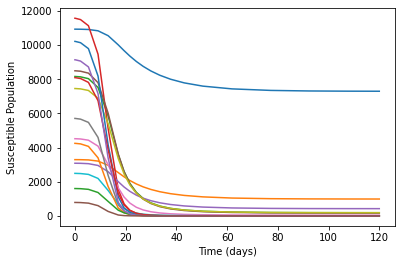

In [65]:
# %matplotlib inline
for i in range(16):
    plt.plot(sol.t, sol.y[i])
    plt.ylabel("Susceptible Population")
    plt.xlabel("Time (days)")

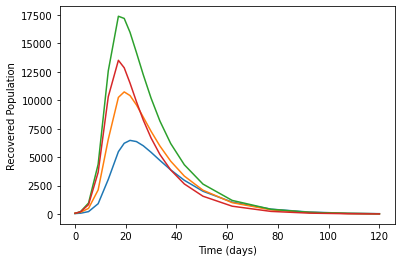

In [66]:
import seaborn as sns
for i in range(16,20):
    sns.lineplot(sol.t, sol.y[i])
    plt.xlabel("Time (days)")
    plt.ylabel("Recovered Population")


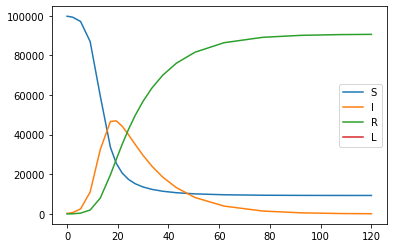

In [67]:

t = np.linspace(0,120,1)
L_total = Lc * sol.sol(t).T[:,16:20]
Lt = sum(L_total.T)
Lt

plt.plot(sol.t, sum(sol.y[:16]), label = 'S')
plt.plot(sol.t, sum(sol.y[16:20]), label = 'I')
plt.plot(sol.t, sol.y[20], label = 'R')
plt.plot(t, Lt, label = 'L')

plt.legend()
plt.show()

In [68]:
non_infected = sol.sol(120)[:16]/S_v_c
non_infected = np.around(non_infected, 1)

x=1
for i in non_infected:
    print("Compartment", x, ':', i, '%')

Compartment 1 : 0.7 %
Compartment 1 : 0.3 %
Compartment 1 : 0.0 %
Compartment 1 : 0.0 %
Compartment 1 : 0.1 %
Compartment 1 : 0.0 %
Compartment 1 : 0.0 %
Compartment 1 : 0.0 %
Compartment 1 : 0.0 %
Compartment 1 : 0.0 %
Compartment 1 : 0.0 %
Compartment 1 : 0.0 %
Compartment 1 : 0.0 %
Compartment 1 : 0.0 %
Compartment 1 : 0.0 %
Compartment 1 : 0.0 %


In [69]:
B_v_c = np.random.rand(16).reshape(4,4)
B_v_c = np.sort(B_v_c, axis = 0)
B_v_c_2 = np.sort(B_v_c, axis = 1) # Preserve matrix form for later...
B_v_c = B_v_c_2.flatten() # Now we have elements (0,0) (0,1) (0,2) (0,3) (1,0) .... (3,3)
print(B_v_c)
B_v_c = B_v_c *.25
print(B_v_c)

[0.00732587 0.02501915 0.15242256 0.36908511 0.08095487 0.24948106
 0.36981865 0.46372109 0.3639653  0.50969766 0.7040606  0.74092933
 0.69306919 0.72774682 0.79907291 0.8811304 ]
[0.00183147 0.00625479 0.03810564 0.09227128 0.02023872 0.06237027
 0.09245466 0.11593027 0.09099132 0.12742442 0.17601515 0.18523233
 0.1732673  0.1819367  0.19976823 0.2202826 ]


In [70]:
sol = solve_ivp(fun = susceptible_pop_eq, t_span = (0,120,1), y0 = S_v_I_v_R, dense_output = True)
# print(S_v_I_v_R)
print(S_v_c)
print(S_v_I_v_R[:16])

[10925.59735989  3292.42498916  8158.35136699 11564.66095375
  3081.93503133  8490.45835427  4517.30632554  5703.81528811
  7452.56208837  2489.3286058  10210.70031003  4245.92611737
  1601.80065781  8089.09109282  9135.04126738   788.00019138]
[10925.59735989  3292.42498916  8158.35136699 11564.66095375
  3081.93503133  8490.45835427  4517.30632554  5703.81528811
  7452.56208837  2489.3286058  10210.70031003  4245.92611737
  1601.80065781  8089.09109282  9135.04126738   788.00019138]


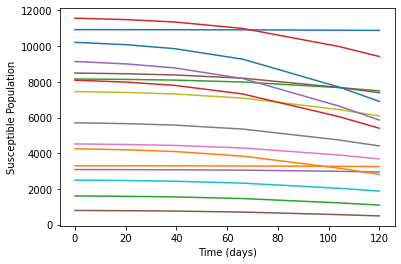

In [71]:
# %matplotlib inline
for i in range(16):
    plt.plot(sol.t, sol.y[i])
    plt.ylabel("Susceptible Population")
    plt.xlabel("Time (days)")



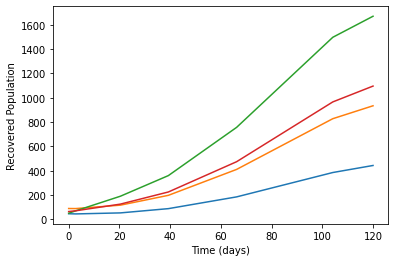

In [72]:

for i in range(16,20):
    sns.lineplot(sol.t, sol.y[i])
    plt.xlabel("Time (days)")
    plt.ylabel("Recovered Population")

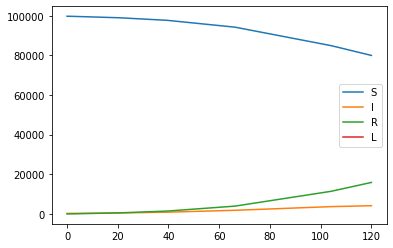

In [73]:
t = np.linspace(0,120,1)
L_total = Lc * sol.sol(t).T[:,16:20]
Lt = sum(L_total.T)
Lt

plt.plot(sol.t, sum(sol.y[:16]), label = 'S')
plt.plot(sol.t, sum(sol.y[16:20]), label = 'I')
plt.plot(sol.t, sol.y[20], label = 'R')
plt.plot(t, Lt, label = 'L')

plt.legend()
plt.show()

In [74]:
non_infected = sol.sol(120)[:16]/S_v_c
non_infected = np.around(non_infected, 1)

x=1
for i in non_infected:
    print("Compartment", x, ':', i, '%')

Compartment 1 : 1.0 %
Compartment 1 : 1.0 %
Compartment 1 : 0.9 %
Compartment 1 : 0.8 %
Compartment 1 : 1.0 %
Compartment 1 : 0.9 %
Compartment 1 : 0.8 %
Compartment 1 : 0.8 %
Compartment 1 : 0.8 %
Compartment 1 : 0.8 %
Compartment 1 : 0.7 %
Compartment 1 : 0.7 %
Compartment 1 : 0.7 %
Compartment 1 : 0.7 %
Compartment 1 : 0.6 %
Compartment 1 : 0.6 %


In [75]:
# Part 1b
data_ = np.load('part1b.npz')
lst_ = data.files
for item in lst_:
    print(item)
    print(data_[item])

N = data_['N']
Lc = data_['Lc']
Ic_0 = data_['Ic_0']
gamma = data_['gamma']
L_validation = data_['L_validation']
L_test = data_['L_test']
betas_validation = data_['betas_validation']

NameError: name 'data' is not defined

In [ ]:
print(L_validation.shape)
np.sum(Lc * Ic_0[1])
b_c = 0.20

In [ ]:
def susceptible_pop_eq_b_(t, y, beta0, beta1, beta2, beta3):
    S_c = y[0:4]
    I_c = y[4:8]
    R = y[8]
    beta = np.array([beta0, beta1, beta2, beta3])
    dS_dt = -beta * S_c * I/N # This should be a 4x1 vector
    dI_dt = -dS_dt - gamma * I_c
    dR_dt = gamma * I_c.sum()
    dS_dI_dR = np.concatenate((dS_dt, dI_dt, [dR_dt]))
    return dS_dI_dR

In [ ]:
from sklearn.metrics import mean_squared_error
from itertools import product
# Gridsearch
# We want to estimate beta 
# We will try different values of beta and see which one fits better the data
# How? We find I_c and then for each node find L_estimated and compare it with L_validation
Sc_pmf = np.array([0.5, 0.3, 0.1, 0.1])
Ic_0_ = Ic_0[0] # Infected people by compartment for first node
Sc_0 = Sc_pmf * (N - Ic_0_)
R_0 = 0
y = np.concatenate((Ic_0_, Sc_0, [R_0])) 
beta_grid = np.linspace(0,1,21)


print(Ic_0, Lc)
for (beta0, beta1, beta2, beta3) in product(beta_grid, beta_grid, beta_grid, beta_grid):
    if not (beta0 >= beta1 >= beta2 >= beta3):
        break
    sol_object = solve_ivp(fun = susceptible_pop_eq_b_,t_span = (0,20), y0 = y, args = (beta0, beta1, beta2, beta3), dense_output = True)
    # We need the solutions I_c to compute L = sum(I_c L_c) 
    solutions = sol_object.sol(0)
    print(solutions[4:8])
    local_mmse = np.inf
    L_estimated = np.sum(Ic_0, Lc)
    mse = mean_squared_error(L_validation[0][0], L_estimated) # Do mse of L estimated and L validation
    if mse < mmse:
        beta_mmse = beta 